#  Ramanan - Project

# Linear Regression with Python Scikit Learn
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

# Simple Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

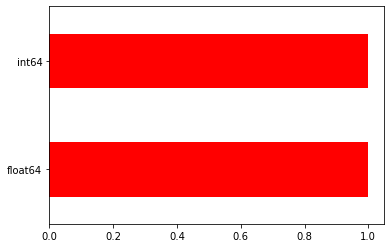

In [5]:
df.dtypes.value_counts().plot(kind = 'barh',color="red")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.duplicated().sum()

0

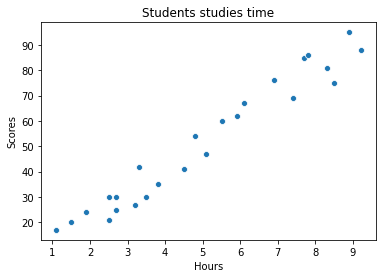

In [8]:
df_2 = sns.scatterplot(x='Hours',y='Scores',data=df)
df_2.set_title("Students studies time");

In [9]:
df.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

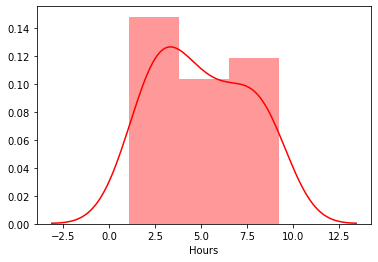

In [10]:
sns.distplot(df["Hours"],color="red")

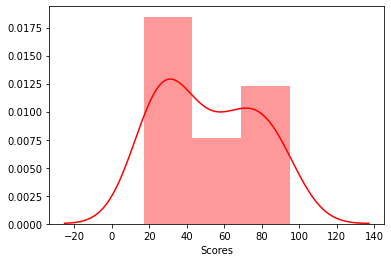

In [11]:
sns.distplot(df["Scores"],color="red")

Text(0.5, 1.0, 'Scatter plot between variables')

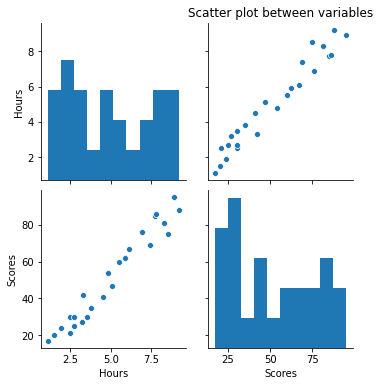

In [12]:
sns.pairplot(df,diag_kind="hist")
plt.title('Scatter plot between variables')

In [13]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


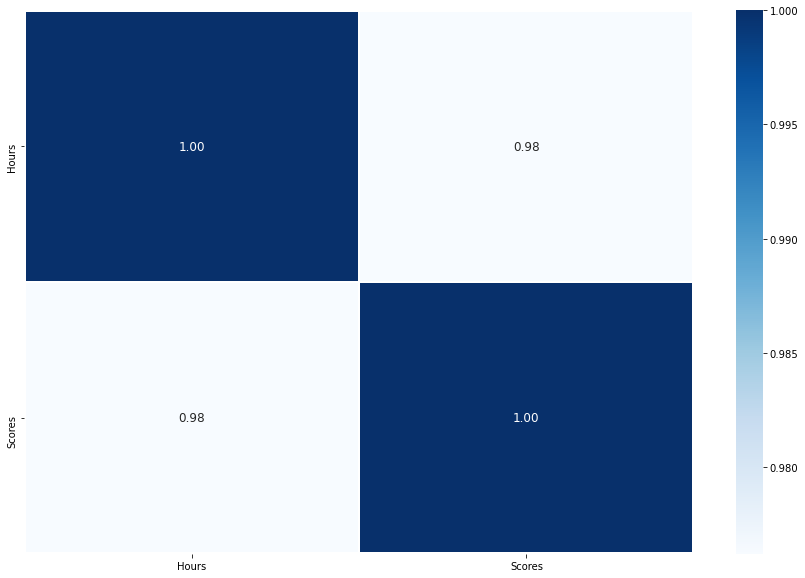

In [14]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), annot= True, annot_kws= {'size' : 12}, cmap = 'Blues', fmt = '.2f', linewidths= 2, linecolor='white')
plt.show();

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

In [16]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [17]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [20]:
print(X_test)
y_pred = lm.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

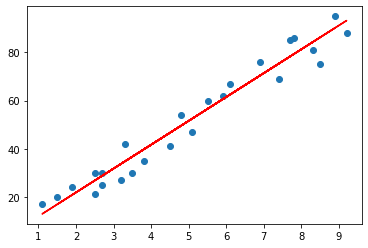

In [22]:
Y_pred = lm.coef_*X+lm.intercept_
plt.scatter(X, y)
plt.plot(X,Y_pred,color="red");
plt.show()

In [23]:

print(9.91065648*6.8+2.018160041434653)

69.41062410543465


In [24]:
prediction_df = pd.DataFrame({'Test': y_test, 'Prediction': y_pred})


In [25]:
prediction_df

,Test,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
print(9.91065648*9.25+2.018160041434653)

93.69173248143466


In [27]:
hours =9.25
prediction_results = lm.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(prediction_results[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [28]:
from sklearn import metrics
print('y-intercept: ',lm.intercept_)
print('Beta coefficients: ',lm.coef_)
print('Mean Abs Error  MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq Error  MSE: ',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2 value: ',metrics.r2_score(y_test, y_pred))

y-intercept:  2.018160041434683
Beta coefficients:  [9.91065648]
Mean Abs Error  MAE:  4.183859899002975
Mean Sq Error  MSE:  21.5987693072174
Root Mean Sq Error RMSE: 4.6474476121003665
r2 value:  0.9454906892105356
